# Dependencies and imports

In [ ]:
# Dependencies
%pip install numpy
%pip install pyvista
%pip install "pyvista[jupyter]" 
%pip install trame ipywidgets


In [1]:
# import numpy as np
# import os
import pyvista as pv
import matplotlib.pyplot as plt
# import torch 

# Loading in the data

In [3]:
image_class = "Diseased"
number = 1

In [ ]:
volume = pv.read(f"ASOCA/{image_class}/CTCA/{image_class}_{number}.nrrd")
centerline = pv.read(f"ASOCA/{image_class}/ReorientedCenterlines/{image_class}_{number}.vtp")
annotations = pv.read(f"ASOCA/{image_class}/Annotations/{image_class}_{number}.nrrd")
mesh = pv.read(f"ASOCA/{image_class}/ReorientedMeshes/{image_class}_{number}.stl")

# Exploratory analysis

## Volumes

Volume:
 ImageData (0x76e19bdbf100)
  N Cells:      58229983
  N Points:     58720256
  X Bounds:     -8.920e+01, 1.084e+02
  Y Bounds:     -1.643e+02, 3.331e+01
  Z Bounds:     -1.851e+02, -4.575e+01
  Dimensions:   512, 512, 224
  Spacing:      3.867e-01, 3.867e-01, 6.250e-01
  N Arrays:     1
Min-Max: -3182 to 3214


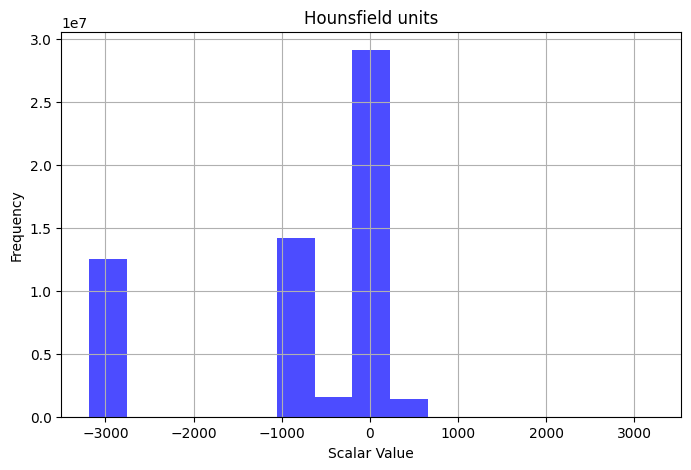

Annotations:
 ImageData (0x76e19bdbf220)
  N Cells:      58229983
  N Points:     58720256
  X Bounds:     -8.920e+01, 1.084e+02
  Y Bounds:     -1.643e+02, 3.331e+01
  Z Bounds:     -1.851e+02, -4.575e+01
  Dimensions:   512, 512, 224
  Spacing:      3.867e-01, 3.867e-01, 6.250e-01
  N Arrays:     1
Min-Max: 0 to 1


In [4]:
print("Volume:\n",volume)


scalar_values = volume.point_data["ImageScalars"] 
print(f"Min-Max: {scalar_values.min()} to {scalar_values.max()}")

plt.figure(figsize=(8, 5))
plt.hist(scalar_values.flatten(), bins=15, color='blue', alpha=0.7)
plt.xlabel("Scalar Value")
plt.ylabel("Frequency")
plt.title(f"Hounsfield units")
plt.grid(True)
plt.show()


print("Annotations:\n",annotations)
scalar_values = annotations.point_data["ImageScalars"] 
print(f"Min-Max: {scalar_values.min()} to {scalar_values.max()}")


## Meshes

In [5]:
print(centerline)
print(mesh)

PolyData (0x76e19bdbf1c0)
  N Cells:    4
  N Points:   4994
  N Strips:   0
  X Bounds:   -3.316e+01, 5.204e+01
  Y Bounds:   -1.088e+02, -1.516e+01
  Z Bounds:   -1.603e+02, -7.493e+01
  N Arrays:   1
PolyData (0x76e19bdbf280)
  N Cells:    46156
  N Points:   23076
  N Strips:   0
  X Bounds:   -3.436e+01, 5.289e+01
  Y Bounds:   -1.098e+02, -1.447e+01
  Z Bounds:   -1.612e+02, -7.288e+01
  N Arrays:   0


# Pyvista visualizer

In [6]:
clim = (0, 300)

In [7]:
plotter = pv.Plotter()
plotter.add_volume(volume, clim=clim, cmap="gray")
# plotter.add_volume(annotations,cmap="cividis",opacity="sigmoid")  
plotter.add_mesh(centerline, color="red", line_width=2)  
plotter.add_mesh(mesh, color="blue",opacity=0.7)
plotter.show()

Widget(value='<iframe src="http://localhost:33685/index.html?ui=P_0x76e18db7bb60_0&reconnect=auto" class="pyvi…